## Tarea de acción 3
### Segmentación supervisada - Grupo 5           
<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo-Universidad-Andres-Bello-2013-Nuevo.jpg" width="150" align="right">

Integrantes del grupo:

1.- Jorge Villablanca

2.- Cindi Elizondo

3.- Juan Carlos Mérida

Para el desarrollo de esta tarea es necesario estudiar el material correspondiente a este módulo,
junto con las clases sincrónicas.

En el ámbito de la salud, la identificación temprana de factores de riesgo cardiovascular es
crucial para la prevención y el tratamiento eficaz de enfermedades como el infarto de miocardio.
En este contexto, el desarrollo de modelos predictivos precisos se ha convertido en una
herramienta fundamental.

En esta tarea, nos enfocaremos en la creación de un modelo predictivo basado en árboles de
decisión para clasificar pacientes según su probabilidad de sufrir un infarto. Antes de
adentrarnos en la construcción del modelo, es esencial realizar un análisis estadístico descriptivo
exhaustivo. Este análisis nos permitirá comprender la distribución de los datos, identificar
posibles correlaciones entre variables y seleccionar aquellas características más relevantes para
la predicción. A través de este enfoque integral, buscamos no solo desarrollar un modelo
preciso, sino también comprender los factores subyacentes que influyen en el riesgo de infarto,
lo que podría mejorar significativamente la atención médica preventiva y el manejo de esta
enfermedad.

La base de datos viene en formato csv (`heart_aux.csv`). Los campos disponibles son:


- `age:` Edad del paciente
- `sex:` Sexo del paciente
- `cp:` Tipo de dolor torácico:
    - 1: Angina típica
    - 2: Angina atípica
    - 3: Dolor no anginoso
    - 4: Asintomático
- `tresbps:` Tensión arterial en reposo (en mm Hg al ingresar en el hospital)
- `chol:` Colesterol en mg/dl obtenido a través del sensor de BMI
- `fbs:` Glucemia en ayunas > 120 mg/dl (1 = verdadero 0 falso)
- `rest_ecg:` Resultado electrocardiográfico en reposo
    - 0: Normal
    - 1: Con anomalía de la onda ST-T (INversiones de la onda T y/o elevación o depresión del ST > 0.05 mV)
    - 2: HIpertrofia ventricular izquierda probable o definida según los criterios de estres.
- `thalach:` Frecuencia cardiaca máxima alcanzada
- `exang:` Angina inducida por ejercicio (1 = Sí, 0 = No)
- `oldpeak:` Depresión del ST inducida por el ejercicio en relación con el reposo
- `slope:` La pendiente del pico del segmento ST de ejercicio
- `ca:` Número de vasos principales (0-3)
- `thal:`1 = Normal, 2 = Defecto y 3 = Defecto reversible
- `target:` Menor probabilidad de infarto (0) y un 1 para mayor probabilidad de infarto



### Actividades

#### 1. Operaciones de limpieza y análsis descriptivo 
`(5 pts.)`

In [1]:
# Manipulación y análisis de datos:
import pandas as pd
import numpy as np

# Para graficar:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Importamos modelo y sus métricas de evaluación:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

### 1.1 Operaciones de limpieza

#### 1.1.1 Cargar la base de datos `heart_aux.csv`, y mostrar cinco registros escogidos al azar, junto con la cantidad de registros y características

In [2]:
# Cargar los datos desde un archivo csv en un DataFrame de pandas:
df = pd.read_csv("heart_aux.csv")
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
907,50.0,0,1,120.0,244,0,1,162.0,0,1.1,2,0,2,1
383,58.0,1,0,150.0,270,0,0,111.0,1,0.8,2,0,3,0
349,62.0,0,2,130.0,263,0,1,97.0,0,1.2,1,1,3,0
834,42.0,1,0,136.0,315,0,1,125.0,1,1.8,1,0,1,0
706,57.0,1,2,128.0,229,0,0,150.0,0,0.4,1,1,3,0


In [3]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 1025
Número de columnas: 14


#### 1.1.2 Desplegar la cantidad de registros duplicados, y eliminar estos.

In [4]:
# Contar duplicados en todo el DataFrame
duplicados_count = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados_count}")

Cantidad de filas duplicadas: 589


In [5]:
# Eliminar duplicados directamente en df
df.drop_duplicates(inplace=True)

#### Revisamos nuevamente la cantidad de filas y columnas:

In [6]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 436
Número de columnas: 14


#### 1.1.3 Mostrar la cantidad de valores ausentes para cada variable en terminos porcentuales.

In [7]:
# Calcular el porcentaje de valores ausentes para cada columna
percent_missing = df.isnull().sum() * 100 / len(df)

# Crear un DataFrame que solo muestre los porcentajes de valores ausentes de manera ordenada
missing_data = pd.DataFrame(percent_missing, columns=['Percent_Missing'])

# Mostrar el DataFrame
missing_data

,Percent_Missing
age,4.587156
sex,0.000000
cp,0.000000
trestbps,6.880734
chol,0.000000
fbs,0.000000
restecg,0.000000
thalach,9.174312
exang,0.000000
oldpeak,11.697248


#### 1.1.4 Eliminar todos los registros que presenten al menos un valor ausente y mostrar la cantidad de registros resultantes luego de realizar esta operación

In [8]:
# Contar registros con al menos un valor ausente
registros_con_ausentes = df.isnull().any(axis=1).sum()
print(f"Cantidad de registros con al menos un valor ausente: {registros_con_ausentes}")

Cantidad de registros con al menos un valor ausente: 135


In [9]:
# Eliminar registros con al menos un valor ausente directamente en el DataFrame original
df.dropna(inplace=True)

In [10]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 301
Número de columnas: 14


#### 1.1.5 Realize una búsqueda de valores outliers utilizando la regla del rango intercuartílico y muestre la cantidad encontrada por cada variable considerada.

In [11]:
# Definir una función para detectar outliers y también almacenar los límites del IQR
def detect_outliers_iqr_with_limits(df):
    outliers_info = {}
    limits = {}
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Solo para columnas numéricas
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcular los límites superior e inferior para detectar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Contar outliers y almacenar los límites
        outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        limits[column] = (lower_bound, upper_bound)
        outliers_info[column] = outlier_count
    
    return outliers_info, limits

In [12]:
# Detectar outliers y obtener los límites del IQR
outliers_info, iqr_limits = detect_outliers_iqr_with_limits(df)

# Mostrar la cantidad de outliers por cada columna
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers")

# Mostrar el total de outliers encontrados
total_outliers = sum(outliers_info.values())
print(f"Total de outliers encontrados: {total_outliers}")

age: 0 outliers
sex: 0 outliers
cp: 0 outliers
trestbps: 9 outliers
chol: 5 outliers
fbs: 45 outliers
restecg: 0 outliers
thalach: 1 outliers
exang: 0 outliers
oldpeak: 5 outliers
slope: 0 outliers
ca: 24 outliers
thal: 2 outliers
target: 0 outliers
Total de outliers encontrados: 91


#### 1.1.6 Eliminar los valores outliers encontrados, desplegando la cantidad resultante luego de la elliminación

In [13]:
# Función para eliminar los outliers utilizando los límites calculados
def remove_outliers_using_limits(df, iqr_limits):
    df_clean = df.copy()  # Hacemos una copia del DataFrame original
    outliers_mask = pd.Series([False] * len(df_clean), index=df_clean.index)  # Aseguramos que la máscara tenga el mismo índice que df_clean
    
    # Iterar sobre cada columna y marcar los outliers en la máscara
    for column, (lower, upper) in iqr_limits.items():
        outliers_mask |= (df_clean[column] < lower) | (df_clean[column] > upper)
    
    # Eliminar las filas donde se marcó al menos un outlier
    df_clean = df_clean[~outliers_mask]
    
    return df_clean

# Eliminar los outliers usando los límites guardados
df_no_outliers = remove_outliers_using_limits(df, iqr_limits)

# Mostrar la cantidad de registros después de eliminar los outliers
print(f"Cantidad de registros después de eliminar los outliers: {len(df_no_outliers)}")


Cantidad de registros después de eliminar los outliers: 227


In [14]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df_no_outliers.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 227
Número de columnas: 14


##### 1.2. Análisis descriptivo

1.2.1 Realizar un análisis descriptivo con el objetivo de mostrar si las variables explicativas presentan alguna diferencia entre alta probabilidad de infarto y baja probabilidad de infarto. Para esto se sugiere usar boxplot y scatterplot. Para cada visualización debe acompañar una explicación de ella. 

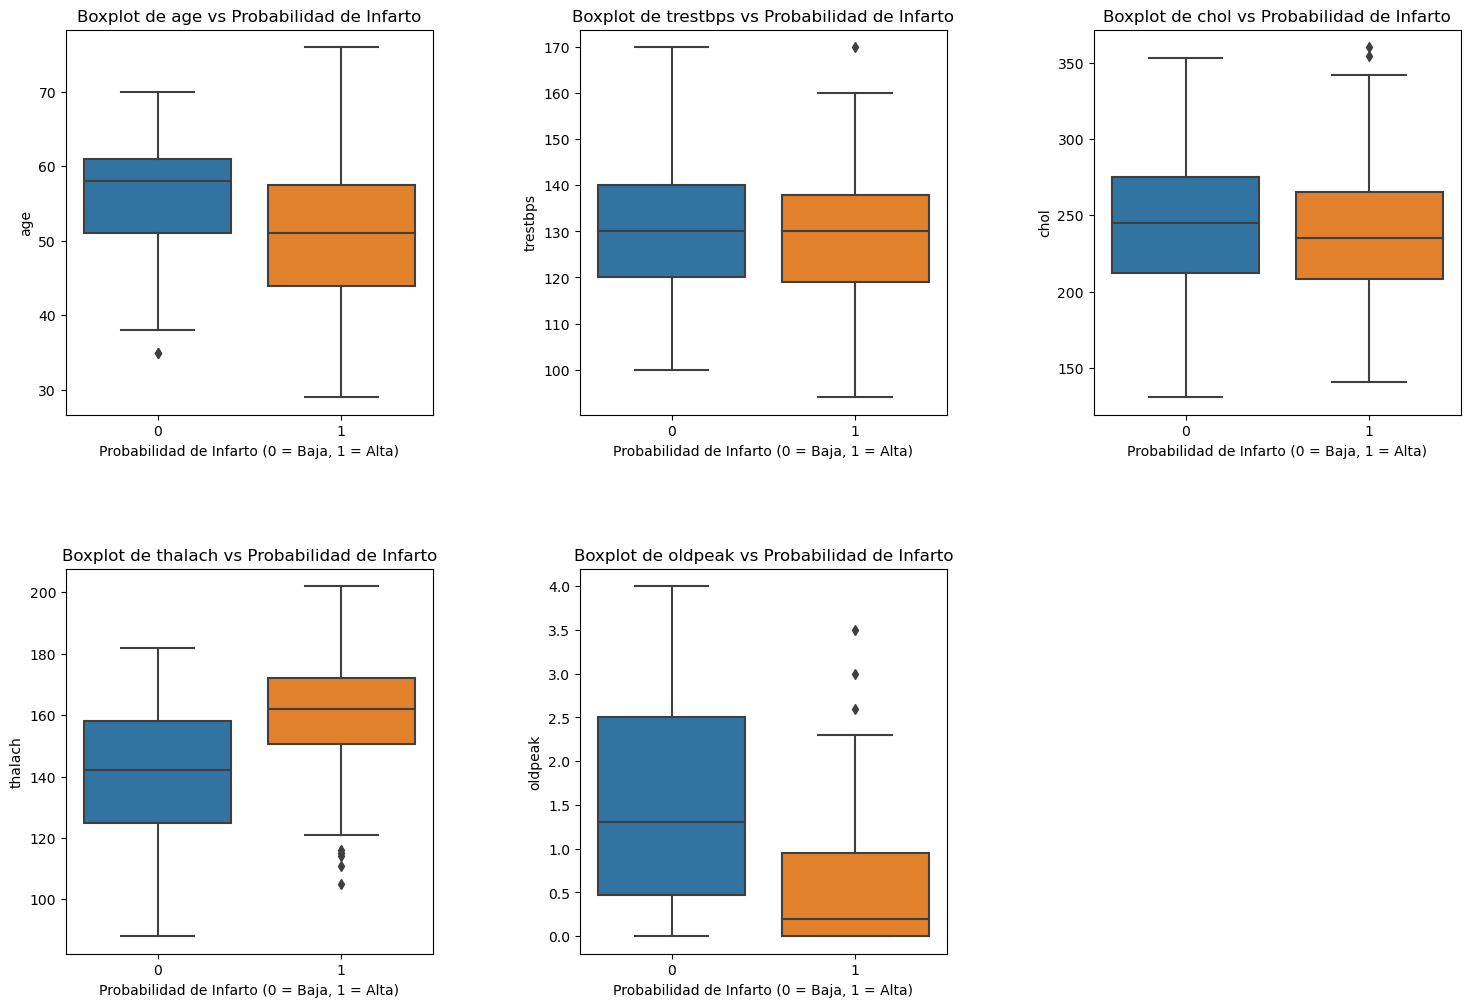

In [15]:
# Lista de columnas continuas para análisis
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Configuración de la disposición de los gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 filas, 3 columnas (aunque el último quedará vacío)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Dibujar boxplots para cada variable numérica continua respecto a 'target'
for i, column in enumerate(continuous_columns):
    row, col = divmod(i, 3)  # Calcular posición en la cuadrícula
    sns.boxplot(data=df_no_outliers, x='target', y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {column} vs Probabilidad de Infarto')
    axes[row, col].set_xlabel('Probabilidad de Infarto (0 = Baja, 1 = Alta)')
    axes[row, col].set_ylabel(column)

# Eliminar el último gráfico vacío
axes[1, 2].axis('off')

plt.show()

#### 1. age vs target:

En el gráfico de age (edad) vs probabilidad de infarto, se observa que la mediana de edad es ligeramente mayor para aquellos con baja probabilidad de infarto (target=0) en comparación con aquellos con alta probabilidad (target=1), se observa que el rango de edad para target 1 va de 45 a 55 años.

Sin embargo, hay una gran superposición en los rangos de edad entre ambos grupos. Esto indica que, aunque la edad podría influir, no parece ser un factor distintivo significativo entre alta y baja probabilidad de infarto en este conjunto de datos.


#### 2. trestbps vs target:

Trestbps (presión arterial en reposo) muestra una distribución similar entre ambos grupos de target, con medianas y rangos muy próximos.

Aunque se observan algunos valores atípicos en ambos grupos, los rangos son casi idénticos, lo que sugiere que trestbps puede no ser una variable particularmente útil para diferenciar entre alta y baja probabilidad de infarto.

#### 3. chol vs target:

En el caso de chol (colesterol), la mediana es similar para ambos grupos de target, pero el grupo con alta probabilidad de infarto (target=1) tiene un rango ligeramente más bajo en comparación con el grupo de baja probabilidad.

No obstante, la diferencia no parece ser significativa, y ambos grupos tienen una considerable superposición en sus distribuciones, lo cual indica que el nivel de colesterol no es un fuerte diferenciador entre alta y baja probabilidad de infarto en estos datos.

#### 4. thalach vs target:

thalach (frecuencia cardíaca máxima alcanzada) presenta una diferencia notable en la mediana entre los grupos de target.

El grupo con alta probabilidad de infarto (target=1) tiene una mediana de frecuencia cardíaca máxima superior de 160 al grupo con baja probabilidad de infarto (target=0). Además, el rango de valores es también mayor para el grupo con alta probabilidad.

Esto sugiere que la frecuencia cardíaca máxima podría ser un factor relevante para distinguir entre pacientes con alta y baja probabilidad de infarto, siendo uno de los indicadores más prometedores en este análisis.

#### 5. oldpeak vs target:

oldpeak (depresión del ST inducida por el ejercicio en relación con el reposo) muestra una diferencia clara entre los grupos de target.

El grupo con baja probabilidad de infarto (target=0) presenta un rango más amplio y valores mayores de oldpeak en comparación con el grupo con alta probabilidad de infarto (target=1).

Esta variable parece ser relevante, ya que los valores bajos de oldpeak tienden a asociarse con alta probabilidad de infarto en este conjunto de datos.

#### Podríamos decir que:

De estos gráficos, parece que las variables thalach y oldpeak son las que presentan diferencias más significativas entre los grupos de alta y baja probabilidad de infarto. Estas diferencias sugieren que estas dos variables podrían ser factores importantes para predecir el riesgo de infarto y deberían considerarse con atención en la construcción del modelo predictivo.

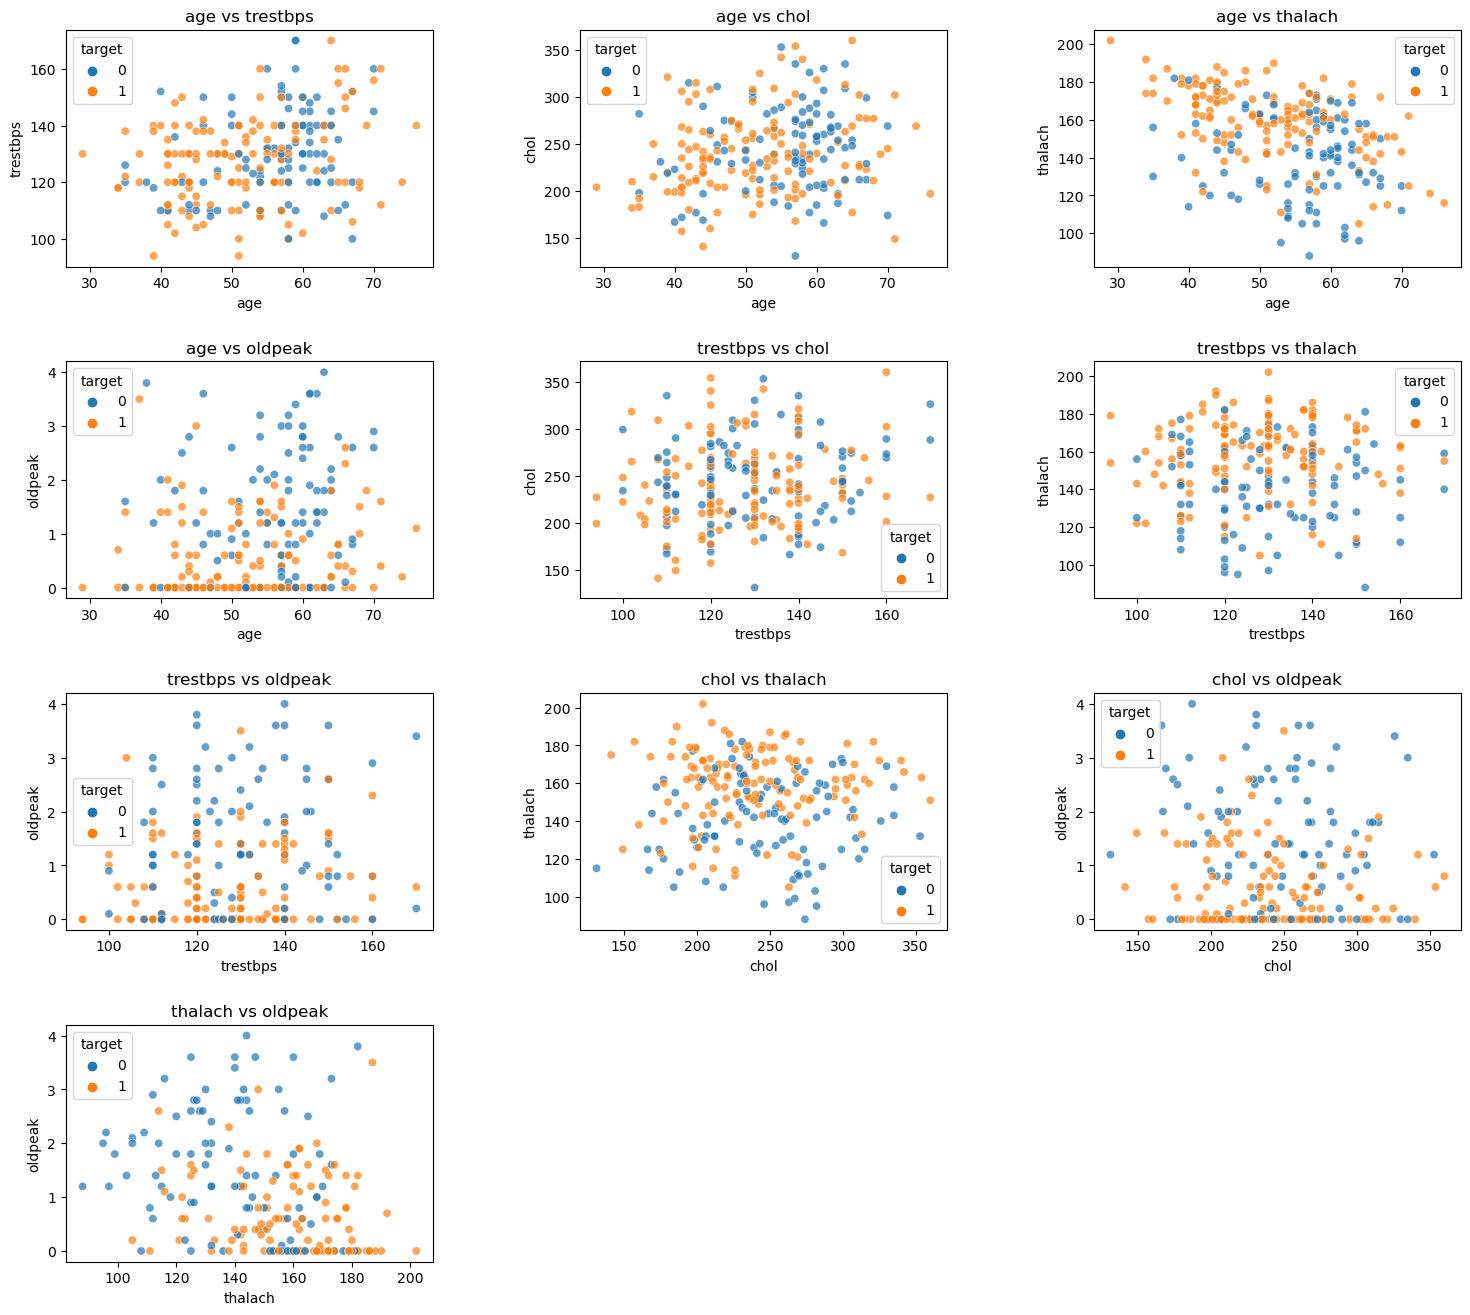

In [16]:
from itertools import combinations

# Lista de variables continuas para hacer las combinaciones
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Crear combinaciones de pares de variables
combinations_pairs = list(combinations(continuous_columns, 2))

# Configuración de la cuadrícula de gráficos
fig, axes = plt.subplots(4, 3, figsize=(18, 16))  # 4 filas y 3 columnas
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterar sobre cada par de combinaciones y crear un scatterplot
for i, (x, y) in enumerate(combinations_pairs):
    row, col = divmod(i, 3)  # Calcular la posición en la cuadrícula
    sns.scatterplot(data=df_no_outliers, x=x, y=y, hue='target', alpha=0.7, ax=axes[row, col])
    axes[row, col].set_title(f'{x} vs {y}')
    axes[row, col].set_xlabel(x)
    axes[row, col].set_ylabel(y)

# Eliminar gráficos vacíos si quedan en la última fila
for j in range(i + 1, 4 * 3):  # 4 filas * 3 columnas = 12 gráficos en total
    row, col = divmod(j, 3)
    axes[row, col].axis('off')

plt.show()

En el análisis de las combinaciones de variables continuas respecto a la probabilidad de infarto (target), se observaron patrones de utilidad variable. Podemos clasificar las variables en dos grupos: aquellas que aportan información relevante para diferenciar entre alta y baja probabilidad de infarto y aquellas que no parecen tener una relación clara en este conjunto de datos.

#### Variables Relevantes para el Análisis del Riesgo de Infarto

- thalach (Frecuencia Cardíaca Máxima):

thalach es una de las variables que más consistentemente muestra diferencias entre los grupos de target. Los pacientes con alta probabilidad de infarto (target=1) tienden a presentar valores más altos de frecuencia cardíaca máxima. Esto sugiere que una respuesta cardíaca elevada bajo esfuerzo podría estar asociada con un mayor riesgo de infarto, posiblemente debido a condiciones subyacentes que dificultan la regulación del ritmo cardíaco.

- oldpeak (Depresión del ST inducida por el ejercicio):

oldpeak también es una variable destacada. Los valores bajos de oldpeak están asociados con una mayor probabilidad de infarto, mientras que los valores más altos tienden a asociarse con un menor riesgo. Esto es consistente con el hecho de que la depresión del ST indica posibles anomalías en el flujo sanguíneo hacia el corazón bajo condiciones de estrés.
En combinación con thalach, la relación se vuelve aún más interesante, ya que los pacientes con alta frecuencia cardíaca máxima y baja depresión del ST parecen estar en un grupo de mayor riesgo. Esta combinación resalta la importancia de oldpeak como indicador complementario de riesgo.

- Combinación de thalach y oldpeak:

La combinación de estas dos variables es particularmente relevante, ya que los pacientes con alta frecuencia cardíaca máxima y baja depresión del ST se agrupan mayormente en el grupo de alta probabilidad de infarto. Esto indica que, cuando se consideran conjuntamente, thalach y oldpeak pueden proporcionar una visión más precisa sobre el riesgo de infarto.

#### Variables con Información Limitada

- age (Edad):

Aunque la edad es un factor conocido en el riesgo cardiovascular, en este análisis no se observa una relación clara entre la edad y la probabilidad de infarto. Los puntos correspondientes a target=0 y target=1 están distribuidos de forma similar a lo largo de la variable age, lo que sugiere que, en este conjunto de datos específico, la edad por sí sola no es un diferenciador claro del riesgo de infarto.
Sin embargo, en combinación con otras variables, age podría complementar la información, aunque su influencia parece ser menor en comparación con thalach y oldpeak.

- trestbps (Presión Arterial en Reposo):

La presión arterial en reposo, otra medida de riesgo cardiovascular, no muestra una diferencia significativa entre los grupos de target. Los valores de trestbps se distribuyen de manera similar para ambos grupos, lo que indica que, en este conjunto de datos, esta variable no aporta mucha información para diferenciar entre alta y baja probabilidad de infarto.

La falta de diferenciación sugiere que trestbps puede no ser tan relevante para predecir el riesgo de infarto en comparación con otras variables.

- chol (Colesterol):

Al igual que trestbps, los niveles de colesterol (chol) no muestran una separación clara entre los grupos de target. A pesar de ser un conocido factor de riesgo cardiovascular, en este conjunto de datos específico, chol no parece ser un indicador fuerte de la probabilidad de infarto.

Los gráficos que incluyen chol muestran una distribución similar para ambos valores de target, lo cual sugiere que esta variable puede no ser de gran utilidad en el modelo predictivo en este caso.


#### Conclusión General

En resumen, podemos diferenciar las variables continuas en dos grupos según su relevancia para predecir el riesgo de infarto:

- Variables más relevantes: thalach (frecuencia cardíaca máxima) y oldpeak (depresión del ST inducida por ejercicio). Estas variables muestran patrones consistentes y diferenciadores entre los grupos de alta y baja probabilidad de infarto. La combinación de ambas es especialmente poderosa y debería considerarse clave en la construcción de un modelo predictivo.


- Variables menos informativas: age, trestbps (presión arterial en reposo), y chol (colesterol). Estas variables no muestran una diferenciación clara entre los grupos de target en este análisis visual. Aunque son factores de riesgo en la salud cardiovascular, su poder predictivo parece ser limitado en este conjunto de datos.

#### Adicional: Gráficos de barras para variables categóricas:

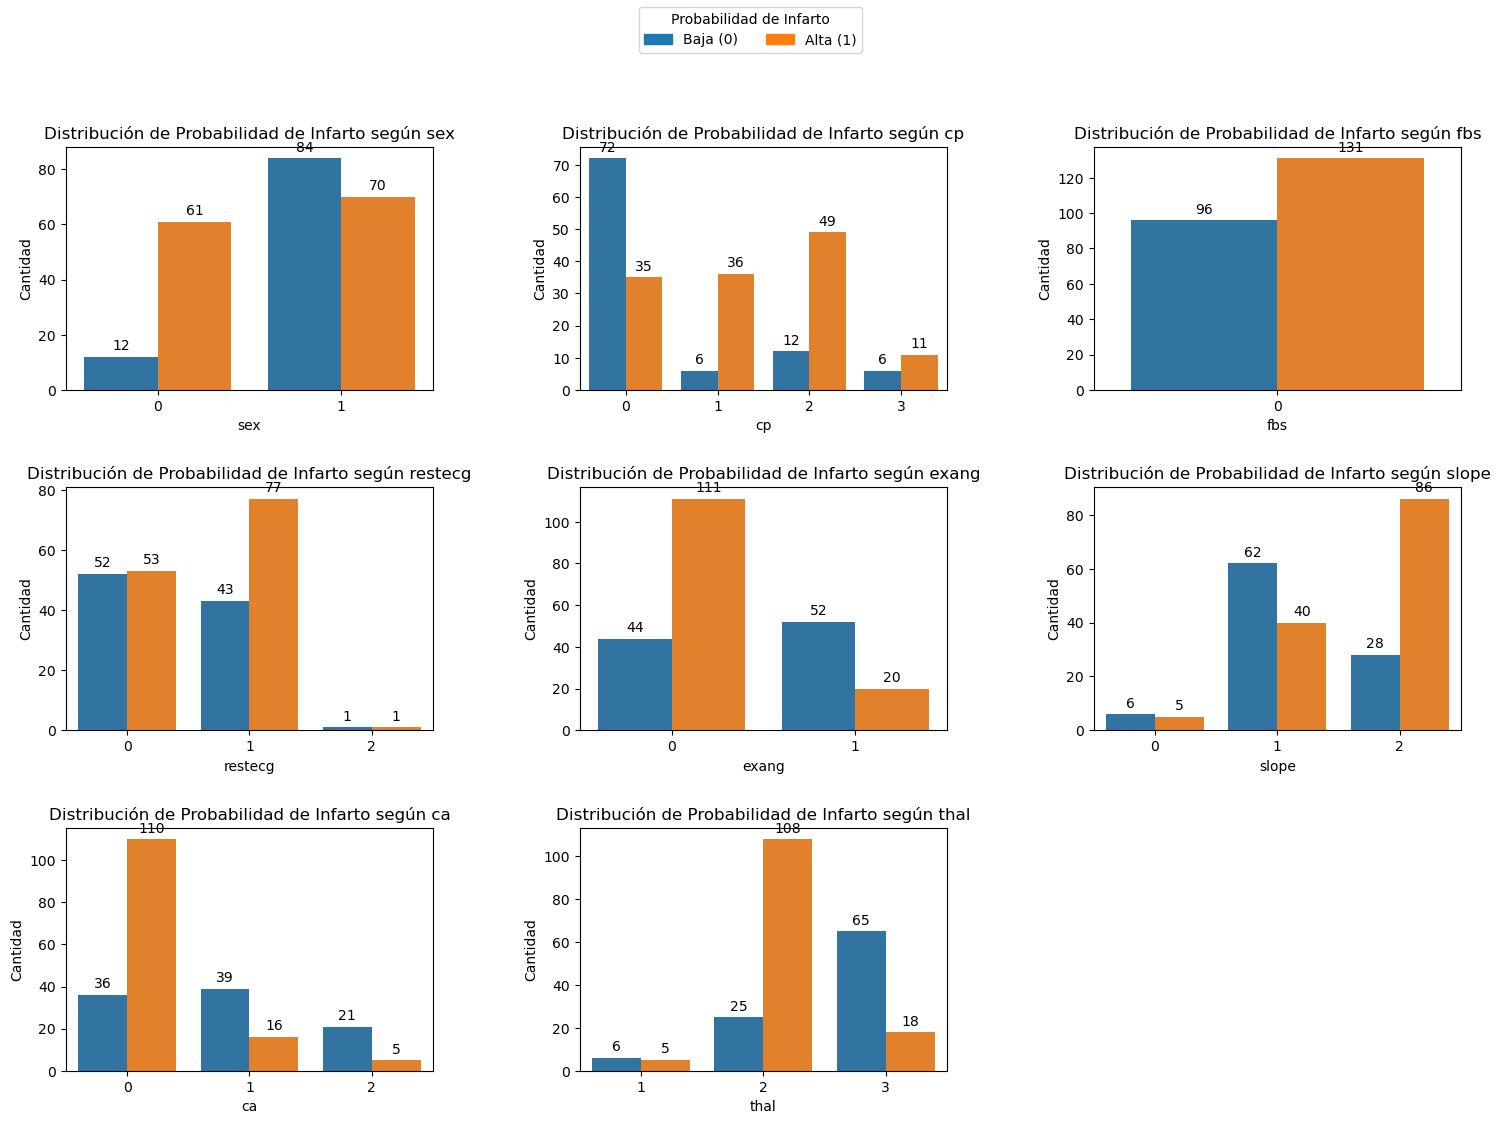

In [18]:
import matplotlib.patches as mpatches

# Lista de variables categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Configurar la cuadrícula de gráficos: 3 gráficos por fila
fig, axes = plt.subplots((len(categorical_columns) + 2) // 3, 3, figsize=(18, 12))  # Tamaño ajustado para 3 gráficos por fila
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterar sobre cada variable categórica y crear un gráfico de barras
for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.countplot(data=df_no_outliers, x=column, hue='target', ax=ax, dodge=True)
    ax.set_title(f'Distribución de Probabilidad de Infarto según {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Cantidad')

    # Añadir etiquetas de datos encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'baseline', 
                    xytext = (0, 5), textcoords = 'offset points')
    
    # Eliminar la leyenda específica de cada gráfico
    ax.get_legend().remove()

# Eliminar gráficos vacíos si quedan en la última fila
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

# Añadir una leyenda general fuera de la cuadrícula de gráficos
# Crear parches para representar los colores de la leyenda
legend_labels = [mpatches.Patch(color=sns.color_palette()[0], label='Baja (0)'),
                 mpatches.Patch(color=sns.color_palette()[1], label='Alta (1)')]
fig.legend(handles=legend_labels, title='Probabilidad de Infarto', loc='upper center', ncol=2)

plt.show()

### Análisis General de las Variables Categóricas

#### 1. Variables con Diferencias Notables entre Probabilidad de Infarto Baja y Alta

- cp (Tipo de Dolor Torácico):

El tipo de dolor torácico parece tener una relación significativa con la probabilidad de infarto. La categoría 0 (sin angina) tiene una proporción mucho mayor de pacientes con baja probabilidad de infarto (target=0), mientras que las otras categorías muestran una distribución más equilibrada o se asocian más con target=1. Esto sugiere que el tipo de dolor torácico podría ser un indicador relevante en la predicción de infarto.

- slope (Pendiente del Segmento ST):

La pendiente del segmento ST también parece tener una relación con el riesgo de infarto. La categoría 2 muestra una mayor proporción de pacientes con alta probabilidad de infarto (target=1), mientras que la categoría 1 tiene una mayor proporción de pacientes con baja probabilidad. Este patrón indica que slope podría ser importante en el modelo predictivo.

- thal (Tipo de Defecto Tálamico):

La variable thal muestra una diferencia clara en la distribución entre target=0 y target=1. Los pacientes en la categoría thal=2 tienen una mayor probabilidad de infarto (target=1), mientras que las otras categorías tienen una distribución más balanceada. Esto sugiere que la presencia de ciertos defectos tálamicos puede estar asociada con un mayor riesgo de infarto.

- ca (Número de Vasos Principales):

En este gráfico, se observa que los pacientes con ca=0 tienen una proporción más alta de probabilidad de infarto (target=1), mientras que aquellos con valores más altos de ca (número de vasos) tienen una distribución más equilibrada o una proporción más alta de target=0. Esto sugiere que la obstrucción en los vasos principales puede estar relacionada con el riesgo de infarto, lo cual es consistente con el riesgo cardiovascular.

#### 2. Variables con Menor Influencia en la Probabilidad de Infarto

- sex (Sexo):

Aunque el gráfico muestra una diferencia en la distribución entre hombres (sex=1) y mujeres (sex=0), la proporción de alta y baja probabilidad de infarto en cada grupo es relativamente similar. Esto indica que el sexo podría no ser un factor de gran peso en la predicción de infarto en este conjunto de datos específico, aunque sigue siendo relevante como contexto en el análisis general de riesgo cardiovascular.

- fbs (Glucemia en Ayunas):

La variable fbs (glucosa en ayunas > 120 mg/dl) no muestra una diferencia clara entre target=0 y target=1. Ambos grupos presentan una proporción similar de alta y baja probabilidad de infarto. Debemos considerar que luego de la limpieza de la data, nos quedamos sin categoría "1" para la variable.

- restecg (Resultado del ECG en Reposo):

Aunque rest_ecg tiene algunas diferencias en los conteos de cada categoría, no hay un patrón claro que diferencie significativamente entre alta y baja probabilidad de infarto. Las distribuciones entre target=0 y target=1 son similares, lo que sugiere que esta variable podría no aportar mucha información para la clasificación del riesgo de infarto.

#### Caso contra estado del arte:

- exang (Angina Inducida por Ejercicio):

La angina inducida por ejercicio (exang) muestra una clara diferencia en la probabilidad de infarto, donde el grupo sin angina "0" tiene una mayor probabilidad de infarto, lo que puede ser contradictorio con el estado del arte.


### Conclusión General

En términos de relevancia para la predicción del riesgo de infarto:

Variables Potencialmente Relevantes: cp (tipo de dolor torácico), slope (pendiente del ST), thal (defecto tálamico) y ca (número de vasos principales) muestran patrones claros de diferenciación entre alta y baja probabilidad de infarto. Estas variables deberían ser consideradas cuidadosamente en la construcción del modelo predictivo.

Variables Menos Informativas: sex, fbs (glucosa en ayunas) y rest_ecg (ECG en reposo) muestran una diferenciación menos clara entre los grupos de target. Aunque pueden tener cierta importancia en el contexto general de la salud cardiovascular, en este conjunto de datos específico parecen ser menos relevantes para la predicción del riesgo de infarto.

#### 2. Segmentar los datos usando holdout (Entrenamiento y test) y Entrenamiento de modelos
`(5 pts.)`

#### 2.1 Divida los datos en 70% para entrenamiento y 30% para test

In [19]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df_no_outliers.drop('target', axis=1)
y = df_no_outliers['target']

# Dividir los datos en 70% para entrenamiento y 30% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 2.2 Entrene seis modelos de árbol de decisión, cada uno con los siguientes hiper parámetros:
1. criterion: 'gini', max_depth: 2
2. criterion: 'gini', max_depth: 3
3. criterion: 'gini', max_depth: 4
4. criterion: 'entropy', max_depth: 2
5. criterion: 'entropy', max_depth: 3
6. criterion: 'entropy', max_depth: 4

In [20]:
# Definir los hiperparámetros para cada modelo
parameters = [
    {'criterion': 'gini', 'max_depth': 2},
    {'criterion': 'gini', 'max_depth': 3},
    {'criterion': 'gini', 'max_depth': 4},
    {'criterion': 'entropy', 'max_depth': 2},
    {'criterion': 'entropy', 'max_depth': 3},
    {'criterion': 'entropy', 'max_depth': 4}
]

# Lista para almacenar los modelos entrenados
models = []

# Entrenar un modelo para cada conjunto de hiperparámetros
for params in parameters:
    # Crear el modelo con los hiperparámetros especificados
    model = DecisionTreeClassifier(criterion=params['criterion'], max_depth=params['max_depth'])
    
    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Agregar el modelo entrenado a la lista
    models.append(model)

# Imprimir la confirmación de los modelos entrenados
for i, model in enumerate(models, 1):
    print(f"Modelo {i}: criterion={model.criterion}, max_depth={model.max_depth}")

Modelo 1: criterion=gini, max_depth=2
Modelo 2: criterion=gini, max_depth=3
Modelo 3: criterion=gini, max_depth=4
Modelo 4: criterion=entropy, max_depth=2
Modelo 5: criterion=entropy, max_depth=3
Modelo 6: criterion=entropy, max_depth=4


#### Visualizamos los árboles construídos:

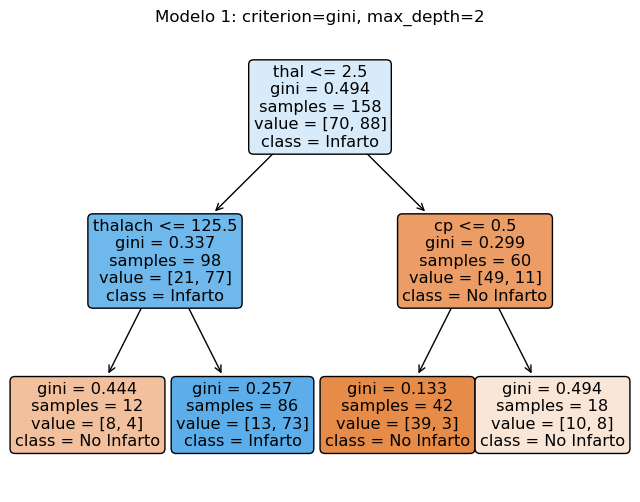

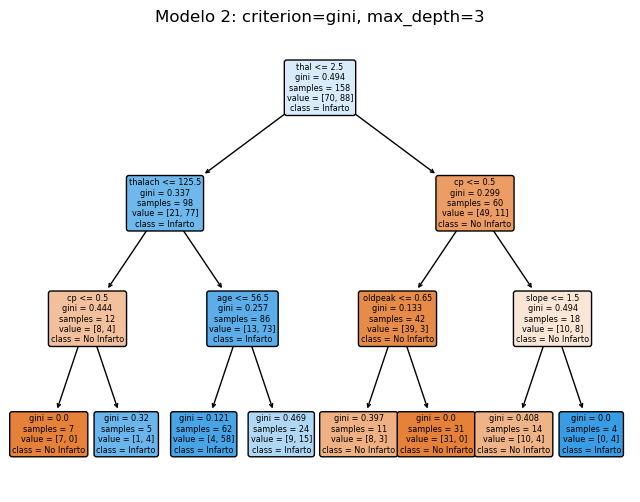

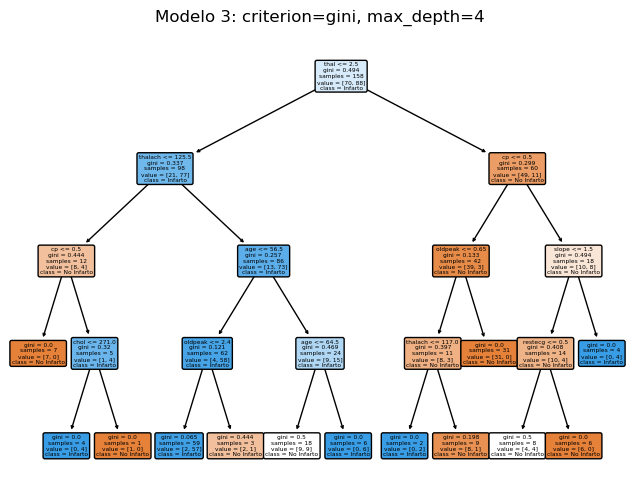

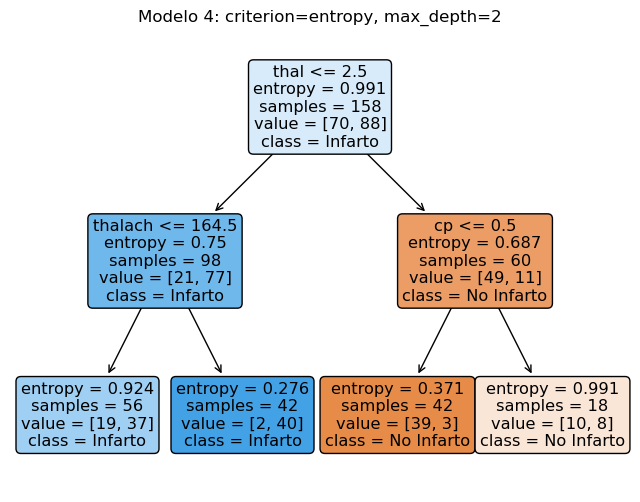

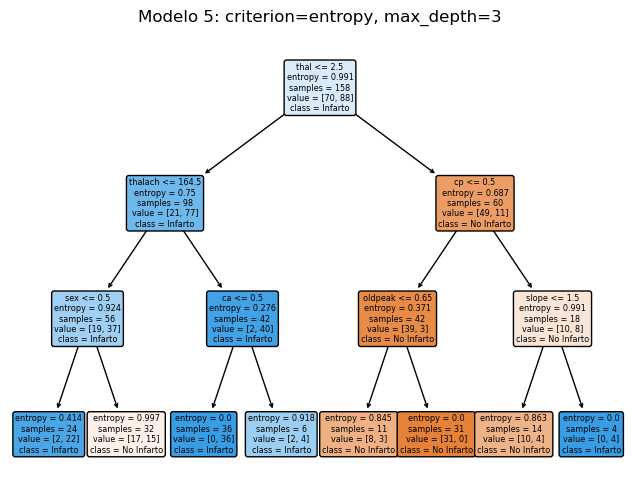

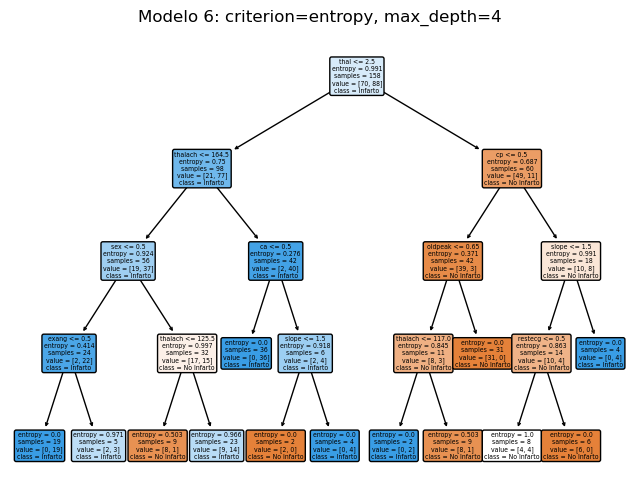

In [21]:
# Graficar cada modelo con tamaño reducido
for i, model in enumerate(models, 1):
    plt.figure(figsize=(8, 6))  # Tamaño ajustado a (8, 6) para hacerlo más compacto
    plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Infarto', 'Infarto'], rounded=True)
    plt.title(f'Modelo {i}: criterion={model.criterion}, max_depth={model.max_depth}')
    plt.show()

#### 3. Evaluación de modelos
`(5 pts.)`

#### 3.1 Para cada modelo entrenado anteriormente, se pide evaluar su desempeño usando métricas adecuadas para ello y mencionar cual modelo resulta ser el mejor en terminos del desempeño

In [22]:
# Lista para almacenar los resultados de cada modelo
results = []

# Evaluar cada modelo en el conjunto de prueba
for i, model in enumerate(models, 1):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas de desempeño
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Almacenar resultados
    results.append({
        'Model': f'Modelo {i} (criterion={model.criterion}, max_depth={model.max_depth})',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convertir los resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results)

# Mostrar los resultados de cada modelo
print("Resultados de cada modelo:")
results_df

Resultados de cada modelo:


,Model,Accuracy,Precision,Recall,F1 Score
0,"Modelo 1 (criterion=gini, max_depth=2)",0.710145,0.794872,0.720930,0.756098
1,"Modelo 2 (criterion=gini, max_depth=3)",0.768116,0.787234,0.860465,0.822222
2,"Modelo 3 (criterion=gini, max_depth=4)",0.724638,0.833333,0.697674,0.759494
3,"Modelo 4 (criterion=entropy, max_depth=2)",0.753623,0.782609,0.837209,0.808989
4,"Modelo 5 (criterion=entropy, max_depth=3)",0.768116,0.864865,0.744186,0.800000
5,"Modelo 6 (criterion=entropy, max_depth=4)",0.797101,0.795918,0.906977,0.847826


Las métricas de evaluación son distintas entre modelos teniendo en general un mejor desempeño el modelo 5 y  el modelo 6.

In [33]:
# Identificar el mejor modelo según cada métrica y mostrar el resultado con un mensaje claro
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision_model = results_df.loc[results_df['Precision'].idxmax()]
best_recall_model = results_df.loc[results_df['Recall'].idxmax()]
best_f1_score_model = results_df.loc[results_df['F1 Score'].idxmax()]

# Mostrar los mejores modelos según cada métrica con mensajes claros
print("\nEl mejor modelo según Accuracy es:")
print(best_accuracy_model)

print("\nEl mejor modelo según Precision es:")
print(best_precision_model)

print("\nEl mejor modelo según Recall es:")
print(best_recall_model)

print("\nEl mejor modelo según F1 Score es:")
print(best_f1_score_model)


El mejor modelo según Accuracy es:
Model        Modelo 6 (criterion=entropy, max_depth=4)
Accuracy                                      0.797101
Precision                                     0.795918
Recall                                        0.906977
F1 Score                                      0.847826
Name: 5, dtype: object

El mejor modelo según Precision es:
Model        Modelo 5 (criterion=entropy, max_depth=3)
Accuracy                                      0.768116
Precision                                     0.864865
Recall                                        0.744186
F1 Score                                           0.8
Name: 4, dtype: object

El mejor modelo según Recall es:
Model        Modelo 6 (criterion=entropy, max_depth=4)
Accuracy                                      0.797101
Precision                                     0.795918
Recall                                        0.906977
F1 Score                                      0.847826
Name: 5, dtype: object

En el contexto de predicción de infarto, donde los falsos negativos pueden tener graves consecuencias, es crucial seleccionar un modelo que minimice estos errores, asegurando que se identifiquen correctamente los casos de alto riesgo. Dado esto, el Recall se vuelve una métrica prioritaria, ya que permite capturar la mayor cantidad de pacientes de alto riesgo. Al mismo tiempo, buscamos un buen F1 Score que combine precisión y sensibilidad, además de un Accuracy elevado para reflejar el rendimiento general del modelo.

Según lo descrito, el Modelo 6 (criterio de entropy y max_depth=4) se destaca como el mejor, ya que maximiza tanto el Recall (0,91) como el F1 Score (0,85), logrando además un Accuracy elevado (0,80). Este modelo ofrece un buen equilibrio entre rendimiento general y sensibilidad hacia los casos de alto riesgo, lo que lo convierte en la opción más adecuada para minimizar los falsos negativos y mejorar la seguridad de los pacientes en la predicción de infarto.

#### 3.2 Visualize el diagrama de árbol para el mejor modelo encontrado.

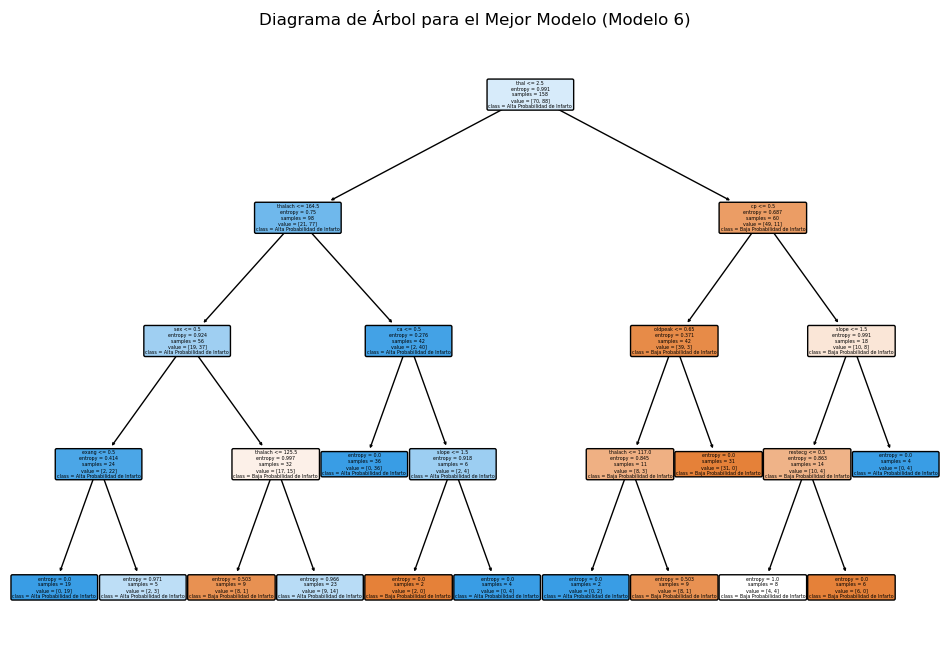

In [34]:
# El Modelo 6 es el mejor modelo, lo obtenemos de la lista de modelos
best_model = models[5]  # Modelo 6 corresponde al índice 5 en la lista 'models'

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Visualizar el árbol de decisión
plot_tree(
    best_model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['Baja Probabilidad de Infarto', 'Alta Probabilidad de Infarto'], 
    rounded=True
)

# Añadir título
plt.title("Diagrama de Árbol para el Mejor Modelo (Modelo 6)")
plt.show()

#### Para visualizarlo con mas claridad lo agrandamos usando graphviz:

In [36]:
df_no_outliers.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,70.0,1,0,145.0,174,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161.0,0,0.0,2,1,3,0
5,58.0,0,0,100.0,248,0,0,122.0,0,1.0,1,0,2,1
7,55.0,1,0,160.0,289,0,0,145.0,1,0.8,1,1,3,0
9,54.0,1,0,122.0,286,0,0,116.0,1,3.2,1,2,2,0


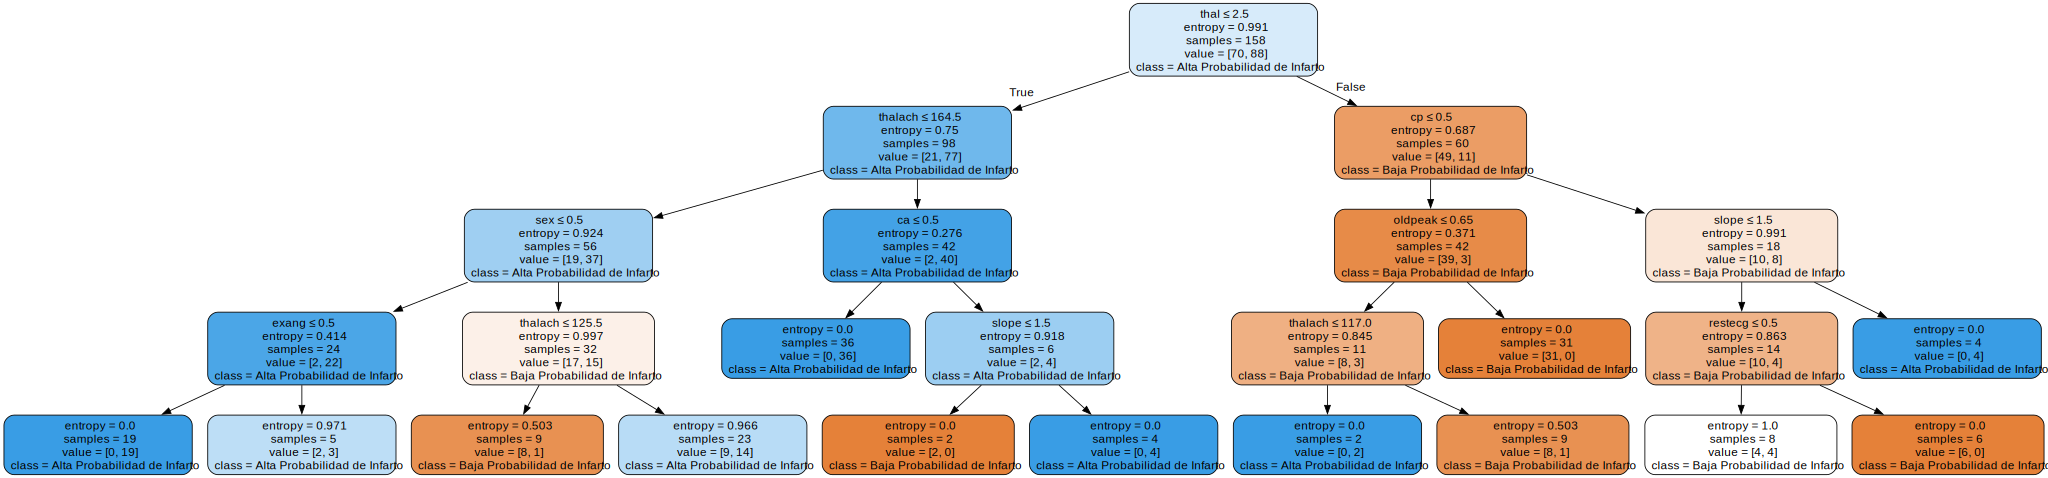

In [35]:
# Seleccionar el mejor modelo (Modelo 6)
best_model = models[5]  # Modelo 6 corresponde al índice 5 en la lista 'models'

# Exportar el árbol en formato DOT usando graphviz
dot_data = export_graphviz(
    best_model, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Baja Probabilidad de Infarto', 'Alta Probabilidad de Infarto'], 
    filled=True, 
    rounded=True, 
    special_characters=True
) 

# Crear una visualización interactiva de graphviz en el notebook
graph = graphviz.Source(dot_data)

# Mostrar el gráfico en el notebook
display(graph)

1. Describa las variables más importantes y las menos relevantes, según el mejor modelo.
2. ¿Es coherente el árbol generado ?

Observando el árbol de decisión generado, podemos identificar las variables más importantes y las menos relevantes en función de su posición en los niveles del árbol.

### 1.- Describa las variables más importantes y las menos relevantes, según el mejor modelo.

#### Variables más importantes:

- thal: Aparece en el primer nivel del árbol lo que indica que es una variable clave para definir entre una baja y alta probabilidad de infarto.

- thalach (frecuencia cardíaca máxima alcanzada): Aparece en el segundo nivel del arbol lo que indica que es una variable importante para diferenciar entre alta y baja probabilidad de infarto. En el análisis descriptivo previo, esta variable también mostró diferencias significativas entre los grupos de alta y baja probabilidad de infarto, lo que refuerza su relevancia clínica.

- cp (tipo de dolor torácico): Aparece también en el segundo nivel, indicando su importancia en el proceso de clasificación. El tipo de dolor torácico es un factor clínico importante, y en nuestro análisis descriptivo, esta variable demostró diferencias entre las probabilidades de infarto, confirmando su relevancia en el modelo.

- ca (número de vasos principales): Esta variable aparece en el tercer nivel, lo que sugiere que es altamente relevante en la clasificación. En el análisis descriptivo, observamos que ca mostraba diferencias notables entre los dos grupos de riesgo, lo cual es coherente con su posición en el árbol de decisión y con el conocimiento clínico sobre el riesgo cardiovascular.

- sex (sexo): Aparece también en el tercer nivel del árbol, lo que es determinante en la clasificación entre una alta o baja probabilidad de infarto. Aunque su distribución no fue determinante en el análisis previo, el árbol de decisión consideró relevante esta variable para clasificar ente un grupo y el otro.

#### Variables menos relevantes:

exang (angina inducida por ejercicio), y slope (pendiente del ST): Estas variables aparecen en niveles inferiores derecho del árbol y tienen menor impacto en la clasificación. En el análisis descriptivo previo, estas variables mostraron menos variación entre los grupos de riesgo, lo cual es consistente con su posición en el árbol de decisión, ya que su capacidad para diferenciar los grupos es limitada en comparación con las variables más relevantes. Oldspeak parece ser menos relevante en el árbol de decisión cuando realmente en nuestro análisis previo si se consideró como factor de riesgo relevante. Variables como chol, age, fbs nisiquiera aparecieron en el árbol de decisión así que su importancia es menor aún.


### ¿Es coherente el árbol generado ?

El árbol de decisión muestra coherencia en la selección de variables clave para la clasificación del riesgo de infarto, alineándose en gran medida con nuestro análisis descriptivo. Las variables que el modelo identificó como más importantes (thal, thalach, cp, ca y sex) son clínicamente relevantes y coinciden en su mayoría con las que consideramos significativas en el análisis previo. Es interesante que sex, una variable que inicialmente no consideramos particularmente relevante, fue seleccionada por el árbol, lo que sugiere que aporta información valiosa en la predicción del riesgo.

En cuanto a oldpeak, aunque fue utilizada en el modelo de árbol, su relevancia es menor ya que aparece en el tercer nivel y en el lado derecho del árbol, indicando que contribuye principalmente a la clasificación de bajo riesgo. Dado que nuestro enfoque es minimizar los falsos negativos (identificar correctamente los casos de alto riesgo), su posición en el árbol reduce su importancia relativa en comparación con otras variables.

En general, el modelo demuestra robustez al capturar patrones consistentes y respaldados clínicamente, aunque no todas las variables consideradas inicialmente relevantes contribuyen significativamente a la clasificación según el árbol de decisión.

#### 4. Predicciones usando mejor modelo
`(5 pts)`

#### 4.1 Cargar la base de datos `heart_val.csv` y usar para realizar predicciones utilizando el mejor modelo ya entrenado.

In [37]:
# Cargar la data para realizar predicciones:
df_predicciones = pd.read_csv("heart_val.csv")
df_predicciones.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
1,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
2,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
3,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
4,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0


In [38]:
# Obtener la cantidad de filas y columnas del DataFrame
filas, columnas = df_predicciones.shape

# Imprimir el número de filas y columnas del DataFrame
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 136
Número de columnas: 14


In [39]:
# Separar las características (X) y la variable objetivo (y)
X_pred = df_predicciones.drop(columns=['target'])  # Eliminar la columna 'target' para que solo queden las características
y_true = df_predicciones['target']                 # Extraer la variable objetivo

# Asegurarse de que las columnas de X_pred coincidan con las utilizadas en el entrenamiento
X_pred = X_pred[X.columns]  

# Realizar predicciones utilizando el mejor modelo ya entrenado (Modelo 6 en este caso)
y_pred = models[5].predict(X_pred)

# Añadir las predicciones como una nueva columna en el DataFrame
df_predicciones['Prediccion'] = y_pred

# Mostrar las primeras filas con las predicciones y el valor real
df_predicciones[['target', 'Prediccion']].head()

,target,Prediccion
0,1,1
1,0,1
2,1,0
3,1,0
4,0,0


#### 4.2 Muestre la cantidad de aciertos y fallos 

In [40]:
# Calcular la cantidad de aciertos y fallos
aciertos = (y_pred == y_true).sum()  # Cuenta los casos donde la predicción coincide con el valor real
fallos = (y_pred != y_true).sum()    # Cuenta los casos donde la predicción no coincide con el valor real

# Mostrar los resultados
print(f"Cantidad de aciertos: {aciertos}")
print(f"Cantidad de fallos: {fallos}")

Cantidad de aciertos: 105
Cantidad de fallos: 31


#### 4.3 Calcular las métricas de desempeño sobre las predicciones del conjunto `heart_val.csv` y compare.

In [41]:
# Calcular las métricas de desempeño
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Mostrar las métricas de desempeño
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

Accuracy: 0.7721
Precision: 0.7246
Recall: 0.8065
F1 Score: 0.7634

Matriz de Confusión:
[[55 19]
 [12 50]]


#### Comparación:

In [42]:
# Modelo 6 (criterion='entropy', max_depth=4)
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
best_model.fit(X_train, y_train)

# Evaluación en el conjunto de Entrenamiento
y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Evaluación en el conjunto de Prueba
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Evaluación en el conjunto de Validación (heart_val.csv)
df_predicciones = pd.read_csv("heart_val.csv")
X_val = df_predicciones.drop(columns=['target'])  # Variables predictoras
y_val = df_predicciones['target']  # Variable objetivo
y_val_pred = best_model.predict(X_val)

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Crear un DataFrame para comparar las métricas en los tres conjuntos de datos
df_comparacion = pd.DataFrame({
    "Conjunto": ["Entrenamiento", "Prueba", "Evaluación externa"],
    "Accuracy": [accuracy_train, accuracy_test, accuracy_val],
    "Precision": [precision_train, precision_test, precision_val],
    "Recall": [recall_train, recall_test, recall_val],
    "F1 Score": [f1_train, f1_test, f1_val]
})

# Mostrar el DataFrame de comparación
print("\nComparación de métricas entre entrenamiento, prueba y una evaluación externa para el Modelo 6:")
df_comparacion


Comparación de métricas entre entrenamiento, prueba y una evaluación externa para el Modelo 6:


,Conjunto,Accuracy,Precision,Recall,F1 Score
0,Entrenamiento,0.892405,0.881720,0.931818,0.906077
1,Prueba,0.797101,0.795918,0.906977,0.847826
2,Evaluación externa,0.772059,0.724638,0.806452,0.763359


Al evaluar el Modelo 6 en los conjuntos de entrenamiento, prueba y en una evaluación externa, observamos una disminución progresiva en su rendimiento al pasar de los datos de entrenamiento a los datos no vistos. Este comportamiento puede ser común en modelos de machine learning y refleja cómo el modelo responde a la exposición a datos nuevos. En el conjunto de entrenamiento, el modelo presenta un desempeño elevado con una accuracy de aproximadamente 89%, y altos valores de precisión, recall y F1 Score. Esto indica que el modelo se ha ajustado bien a los patrones específicos de los datos de entrenamiento, identificando correctamente tanto los casos positivos como los negativos en la mayoría de las ocasiones. Sin embargo, este rendimiento tan alto en el conjunto de entrenamiento podría ser una señal de un ligero sobreajuste, ya que el modelo ha capturado detalles específicos de los datos de entrenamiento que no necesariamente generalizan bien.

Al pasar al conjunto de prueba, notamos una disminución en todas las métricas. La accuracy cae al 79,7%, y también se observan disminuciones en precisión y F1 Score, aunque el recall permanece bastante alto en 90,7%. Esto sugiere que, aunque el modelo pierde algo de precisión al enfrentarse a datos no vistos, sigue siendo efectivo en la identificación de los casos positivos.

Esta caída moderada entre entrenamiento y prueba es normal y refleja una capacidad de generalización razonable. Sin embargo, la pérdida de precisión indica que el modelo comienza a clasificar algunos casos negativos como positivos, produciendo falsos positivos. Esto podría ser problemático en situaciones donde la precisión es crucial para evitar diagnósticos erróneos o falsas alarmas.

El rendimiento en el conjunto de evaluación externa (heart_val.csv), que contiene datos completamente nuevos, muestra una disminución adicional en todas las métricas. La accuracy desciende al 77,2%, y la precisión se reduce notablemente, indicando que el modelo tiende a producir más falsos positivos en estos datos externos. Sin embargo, el recall sigue siendo relativamente alto, manteniéndose en 80,6%. Esto significa que, aunque el modelo se vuelve menos preciso en la clasificación de casos positivos, sigue detectando la mayoría de ellos, lo cual es beneficioso en un contexto de salud, donde es preferible minimizar los falsos negativos. La reducción en F1 Score a 76,3% refleja el equilibrio menos favorable entre precisión y recall en datos externos, lo cual es una señal de que el modelo podría beneficiarse de ajustes adicionales para mejorar su desempeño en escenarios reales.

Aún así luego de todo este análisis podemos concluir que en general el modelo de árbol de decisión tiene un rendimiento que va del aceptable a bueno, ya que con datos completamente externos mantiene sus métricas mayores al 70%.

#### 5. Construir un modelo de árbol de decisión para regresión
`(4 pts)`

#### 5.1 Entrene un árbol de regresión con profundidad máxima = 4, usando la misma base de datos anterior (`heart_aux.csv`) luego de su proceso de limpieza y eliminando el atributo `target`. Recuerde dividir nuevamente en entrenamiento y test. El objetivo de este modelos es predecir el nivel de colesterol `chol` usando las otras variables como regresoras.

Debido a que anteriormente ya habiamos limpiado esta data, usaremos el dataframe resultante ya procesado (df. para entrenar el modelo de regresión.

In [43]:
# Partimos del DataFrame limpio `df_no_outliers`
df = df_no_outliers.copy()  # Hacemos una copia para preservar `df_no_outliers` intacto

# Eliminar la columna `target`
df = df.drop(columns=['target'])

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['chol'])  # Todas las columnas excepto 'chol'
y = df['chol']  # Colesterol como variable objetivo

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Crear y entrenar el árbol de regresión con profundidad máxima de 4
tree_regressor = DecisionTreeRegressor(max_depth=4)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

#### 5.2 Realice predicciones con el modelo entrenado anteriormente sobre el conjunto de test y calcule una métrica adecuada de rendimiento.

In [44]:
# Realizar predicciones en el conjunto de prueba
y_pred = tree_regressor.predict(X_test)

# Calcular MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R2
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar todas las métricas
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 2731.31
Root Mean Squared Error (RMSE): 52.26
Mean Absolute Error (MAE): 43.10
R-squared (R2): -0.15
Mean Absolute Percentage Error (MAPE): 17.86%


**Error Cuadrático Medio (MSE):** El valor obtenido para el MSE es 2731,31, lo cual indica que, en promedio, las predicciones del modelo se desvían bastante de los valores reales al estar elevado al cuadrado, una señal de que el modelo no logra capturar adecuadamente la relación entre las variables predictoras y el nivel de colesterol.

**Raíz del Error Cuadrático Medio (RMSE):** El RMSE de 52,26 proporciona una medida del error en las mismas unidades que el colesterol (chol). Este valor sugiere que el modelo tiende a equivocarse en promedio alrededor de 52 puntos de colesterol, lo cual es considerable y confirma la falta de precisión.

**Error Absoluto Medio (MAE):** El MAE de 43,10 también muestra un error promedio en la predicción de aproximadamente 43 unidades de colesterol, lo cual es consistente con el RMSE y refuerza la idea de que el modelo está limitado en su precisión.

**Coeficiente de Determinación (R²):** Un R² de -0,15 es indicativo de que el modelo tiene un desempeño peor que simplemente predecir el promedio de chol para todas las observaciones. En este caso, el valor negativo sugiere que el modelo no está capturando patrones útiles y que la profundidad de 4 niveles es insuficiente para explicar la variabilidad en los datos.

**Error de Porcentaje Absoluto Medio (MAPE):** El MAPE de 17,86% señala que, en promedio, el modelo se desvía en un 17,86% del valor real de colesterol, lo que refuerza la limitación del modelo para hacer predicciones precisas.

#### Profundidad del Árbol

La profundidad del árbol de 4 niveles podría no ser óptima para captar adecuadamente la relación entre las variables predictoras y chol. En modelos de árboles de decisión, una mayor profundidad permite al modelo capturar patrones más complejos y reducir el error en el conjunto de entrenamiento. Sin embargo, existe un balance necesario para evitar el sobreajuste. Al incrementar la profundidad, el modelo podría mejorar en su capacidad predictiva y producir un R² más cercano o incluso positivo, lo cual indicaría una mayor capacidad para explicar la variabilidad en chol.

#### 5.3 Visualize el árbol resultante

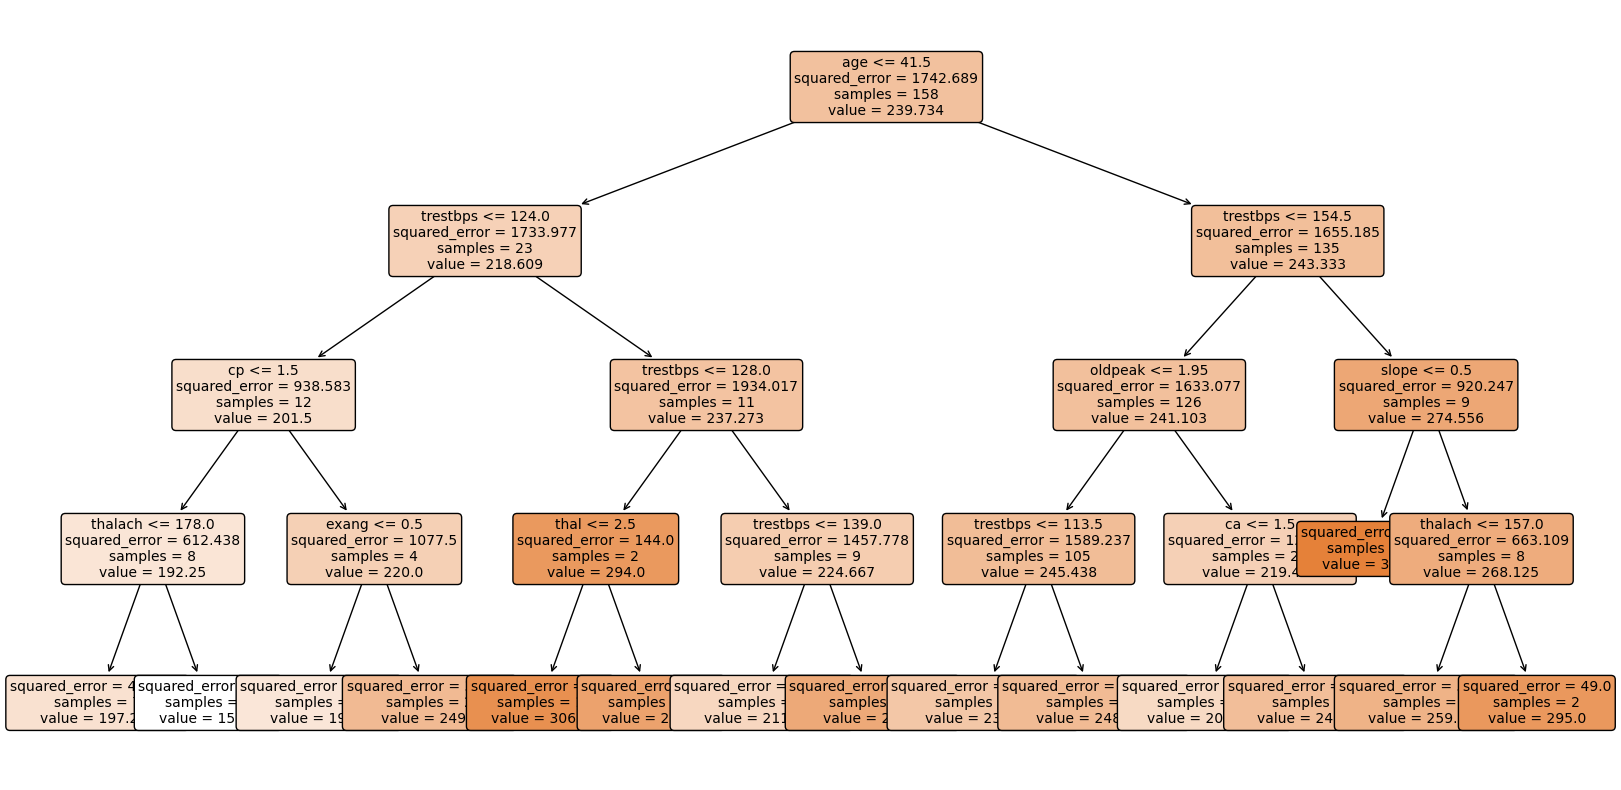

In [45]:
# Ajustar el tamaño de la figura para visualizar mejor el árbol
plt.figure(figsize=(20, 10))

# Graficar el árbol de decisión
plot_tree(tree_regressor, 
          feature_names=X.columns,  # Nombres de las características
          filled=True,              # Colorear nodos de acuerdo con la predicción
          rounded=True,             # Bordes redondeados para mejor legibilidad
          fontsize=10)              # Tamaño de fuente

# Mostrar la gráfica
plt.show()

#### Para una mejor visualización con graphviz:

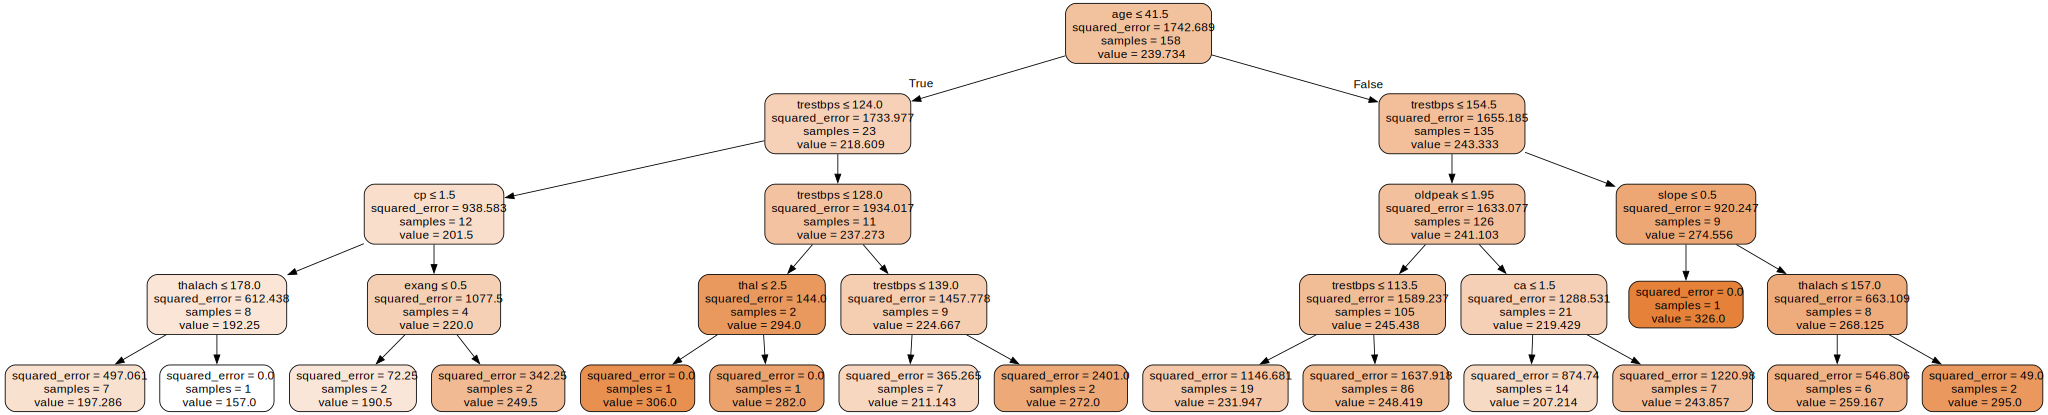

In [46]:
# Exportar el árbol en formato DOT usando graphviz
dot_data = export_graphviz(
    tree_regressor,  # El modelo que se quiere visualizar
    out_file=None, 
    feature_names=X.columns,  # Nombres de las características
    class_names=['Baja Probabilidad de Infarto', 'Alta Probabilidad de Infarto'],  # Nombres de las clases
    filled=True, 
    rounded=True, 
    special_characters=True
) 

# Crear una visualización interactiva de graphviz en el notebook
graph = graphviz.Source(dot_data)

# Mostrar el gráfico en el notebook
display(graph)

#### 5.4 Comente que podemos hacer para mejorar el resultado del modelo

**Incrementar la Profundidad del Árbol:** Una mayor profundidad podría permitir al modelo capturar patrones más complejos en los datos. Sin embargo, esto también podría aumentar el riesgo de sobreajuste, por lo que debemos encontrar un balance óptimo.

**Probar un Bosque Aleatorio (Random Forest):** Los bosques aleatorios combinan múltiples árboles de decisión entrenados con diferentes subconjuntos de datos y características, lo que ayuda a mejorar la precisión y reducir el sobreajuste al promediar las predicciones de los árboles. Esta técnica puede mejorar la capacidad predictiva del modelo en comparación con un solo árbol.

Otra estrategia para mejorar el modelo sería seleccionar las variables más influyentes en la predicción de infartos. Algunas variables en el conjunto de datos podrían tener una relación más fuerte con el riesgo de infarto y, al enfocarnos en ellas, el modelo podría realizar predicciones más precisas al reducir el "ruido" de características menos relevantes.

Adicionalmente, considerar nuevas variables en la recolección de datos podría mejorar la capacidad predictiva del modelo. Variables como el historial familiar de enfermedades cardíacas, hábitos de vida (actividad física, consumo de tabaco y alcohol), biomarcadores de inflamación (como la proteína C-reactiva), y niveles de estrés han demostrado una fuerte relación con el riesgo de infarto. Incluir estas características podría aportar una visión más integral de los factores de riesgo.